# Analysis II

Once we have the processed data we study cases to take a decision. First let's see how the volatility, risk and total return have been changed along on different periods. Let's choose period from 2010, 2020 to 2023, and the months has passed of this year.

#### Graphical Report from 2010-2023 (yearly), 2020-2023 (monthly) and 2023 (weekly), respectively.

<img src="./.src/vrt_2010.png" alt="2010 inform" width="400" height="300">
<img src="./.src/vrt_2020.png" alt="2020 inform" width="400" height="300">
<img src="./.src/vrt_2023.png" alt="2023 inform" width="800" height="600">


Well in the first two graphics we can appreciate Energy sector has great returns and volatility, which means if our cliente thinks in long or middle-term investments it coulb be a good idea because due to great volatility and returns the dividends they could get it would benefit them. However, if they think in short-term that could not be the right. Since the last figure shows us that this sector still registers a great volatility comparated to other sector, but the returns right now are not good, so the client would eventually lose their capital.

Then if our cliente decises to invest in long middle-term we shall consider the sub-industries and what is the principal activities these realises.

Let's see the industry's performing throughout the same periods.

<img src="./.src/sub_2010.png" alt="2010 inform" width="400" height="300">
<img src="./.src/sub_2020.png" alt="2020 inform" width="400" height="300">
<img src="./.src/sub_2023.png" alt="2023 inform" width="800" height="600">

We can appreacite intersting patterns, first all sub industries have had same volatility, second right now the sub industry responsible for Oil-Gas Exploration and production goes down, maybe the sector for renewable energies has growth to replace the industries basen on fuel.

Furthermore, the best subindustries to invest on it would be Oil-Gas Refining and Oil-Gas Equipment and service, which have great returns and volatility, that leads to better gains.

In order to the previous analysis, let's see would be the better companies to invest on, within the sub industries **Oil-Gas Refining and Marketing** and **il-Gas Equipment and Service**.

### Stock Analysis

In [2]:
from get_dataset import MACD, global_return
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from plotly.subplots import make_subplots
import pandas as pd

sector = 'Health Care'
sub = 'Biotechnology'
stock = 'VRTX'
df_stock = MACD(sector, sub, stock)
print(df_stock.shape)
df_stock.head()

(5844, 12)


,Open,High,Low,Close,VRTX,Volume,Returns,EMA-12,EMA-26,MACD,Signal,Histogram
Date,,,,,,,,,,,,
2000-01-03,17.750,18.78125,16.8125,18.78125,18.78125,1010000,NaN,18.781250,18.781250,0.000000,0.000000,0.000000
2000-01-04,18.250,18.31250,17.2500,17.28125,17.28125,265400,-7.99,18.550481,18.670139,-0.119658,-0.023932,-0.095726
2000-01-05,17.125,17.12500,16.5000,17.00000,17.00000,202000,-1.63,18.311945,18.546425,-0.234480,-0.066041,-0.168438
2000-01-06,16.625,16.93750,16.5625,16.75000,16.75000,270600,-1.47,18.071646,18.413356,-0.341710,-0.121175,-0.220535
2000-01-07,16.500,18.50000,16.5000,18.21875,18.21875,813200,8.77,18.094277,18.398941,-0.304664,-0.157873,-0.146791


In [3]:
g_return = global_return()
print(g_return.shape)
g_return.head()

(5844, 1)


,Global
Date,
2000-01-03,NaN
2000-01-04,-3.40
2000-01-05,0.61
2000-01-06,-0.54
2000-01-07,3.60


In [4]:
# first let's create a mask to limit the dateset
start = '2019-01'
mask = (df_stock.index > start)
df_stock = df_stock.loc[mask]
df_stock.index = pd.to_datetime(df_stock.index).date
df_stock.reset_index(inplace=True)
df_stock.head()

,index,Open,High,Low,Close,VRTX,Volume,Returns,EMA-12,EMA-26,MACD,Signal,Histogram
0,2019-01-02,161.210007,165.139999,160.949997,164.080002,164.080002,1465400,-0.98,163.664036,166.674080,-3.010044,-2.993507,-0.016536
1,2019-01-03,165.830002,169.320007,163.179993,163.729996,163.729996,1690900,-0.21,163.674184,166.456000,-2.781816,-2.951169,0.169353
2,2019-01-04,165.899994,173.309998,164.899994,172.699997,172.699997,1874500,5.48,165.062770,166.918518,-1.855748,-2.732085,0.876337
3,2019-01-07,173.050003,176.779999,170.869995,175.850006,175.850006,1294600,1.82,166.722345,167.580110,-0.857765,-2.357221,1.499456
4,2019-01-08,177.000000,178.410004,174.720001,178.190002,178.190002,1653200,1.33,168.486600,168.366028,0.120572,-1.861662,1.982235


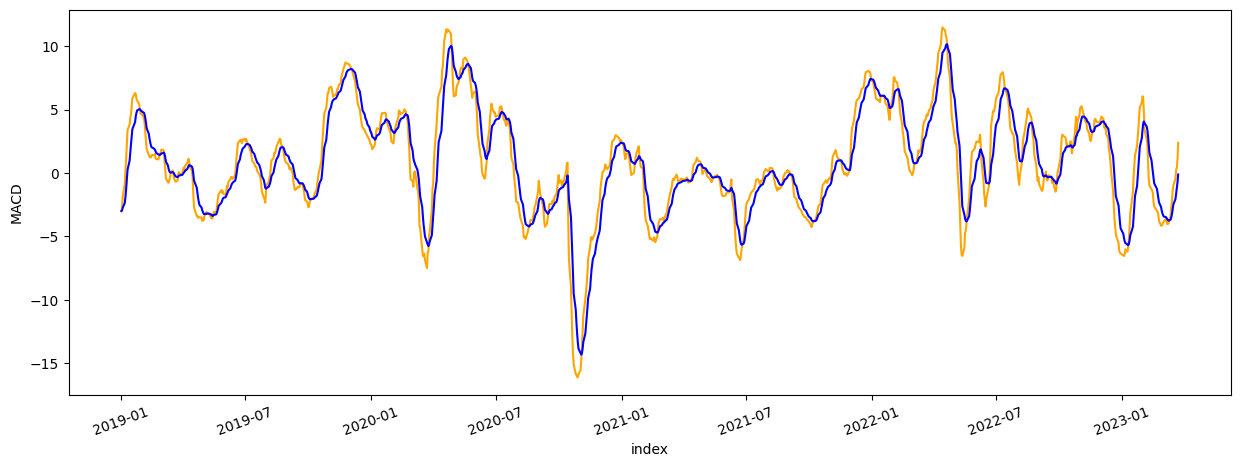

In [12]:
plt.figure(figsize=(15,5))
# color = ['red' if x < 0 else 'green' for x in df_stock['Histogram']]
# sns.barplot(x='index', y='Histogram', data=df_stock.loc[df_stock['Histogram'] > 0], color='green')
# sns.barplot(x='index', y='Histogram', data=df_stock.loc[df_stock['Histogram'] < 0], color='red')
sns.lineplot(x='index', y='MACD', data=df_stock, color='orange')
sns.lineplot(x='index', y='Signal', data=df_stock, color='blue')
plt.xticks(rotation=20)
plt.show()